In [2]:
# 필요한 라이브러리 설치 및 임포트

import pandas as pd

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as recall
import joblib

# [Step 3] 머신러닝 모델링1

#### **<span style="color:blue">[3-1] 학습 및 테스트 데이터 로딩</span>**

In [3]:
# train_x.csv / train_y.csv / test_x.csv / test_y.csv 4개의 데이터 로딩
x_train = pd.read_csv('./train_x.csv')
y_train = pd.read_csv('./train_y.csv')
x_test = pd.read_csv('./test_x.csv')
y_test = pd.read_csv('./test_y.csv')
x_train.tail(2)

,time,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),현지기압(hPa),지면온도(°C),month,day,hour,PM10_lag1
8730,2021-09-30 21:00:00,0.003,0.6,0.012,0.036,30.0,19.0,20.9,0.0,0.4,0.0,83,20.4,999.2,19.2,9,30,21,15.0
8731,2021-09-30 22:00:00,0.003,0.6,0.004,0.042,33.0,19.0,20.4,0.0,0.8,70.0,81,19.4,999.2,18.6,9,30,22,14.0


In [4]:
x_train = x_train.drop('time',axis=1)
y_train = y_train.drop('time',axis=1)
x_test = x_test.drop('time',axis=1)
y_test = y_test.drop('time',axis=1)

In [10]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SO2        8732 non-null   float64
 1   CO         8732 non-null   float64
 2   O3         8732 non-null   float64
 3   NO2        8732 non-null   float64
 4   PM10       8732 non-null   float64
 5   PM25       8732 non-null   float64
 6   기온(°C)     8732 non-null   float64
 7   강수량(mm)    8732 non-null   float64
 8   풍속(m/s)    8732 non-null   float64
 9   풍향(16방위)   8732 non-null   float64
 10  습도(%)      8732 non-null   int64  
 11  증기압(hPa)   8732 non-null   float64
 12  현지기압(hPa)  8732 non-null   float64
 13  지면온도(°C)   8732 non-null   float64
 14  month      8732 non-null   int64  
 15  day        8732 non-null   int64  
 16  hour       8732 non-null   int64  
 17  PM10_lag1  8732 non-null   float64
dtypes: float64(14), int64(4)
memory usage: 1.2 MB


In [5]:
# 풍향은 범주형인데 상관없나?
import seaborn as sns
import matplotlib.pyplot as plt

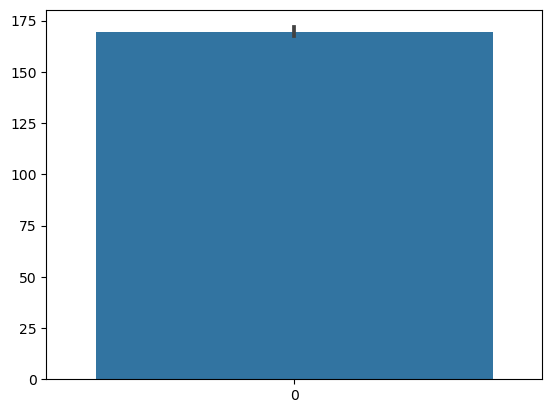

In [8]:
#sns.kdeplot(x_train['풍향(16방위)'],hue=y_train)
sns.barplot(x_train['풍향(16방위)'])
plt.show()

---

In [117]:
x_test

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),현지기압(hPa),지면온도(°C),month,day,hour,PM10_lag1
0,0.004,0.8,0.002,0.052,38.0,24.0,-2.8,0.0,2.3,50,55,2.7,1016.3,-3.3,1,2,0,23.0
1,0.004,0.8,0.002,0.052,34.0,23.0,-2.9,0.0,2.1,50,57,2.8,1015.8,-3.4,1,2,1,20.0
2,0.004,0.8,0.002,0.052,35.0,26.0,-2.6,0.0,1.9,50,57,2.9,1015.3,-2.5,1,2,2,20.0
3,0.004,0.6,0.002,0.046,33.0,24.0,-2.1,0.0,2.5,50,56,2.9,1015.1,-2.1,1,2,3,19.0
4,0.003,0.5,0.005,0.039,33.0,25.0,-1.9,0.0,2.0,50,55,2.9,1014.3,-2.1,1,2,4,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,0.002,0.4,0.044,0.010,10.0,9.0,13.2,0.0,4.3,340,45,6.8,1013.1,12.4,3,31,18,29.0
2131,0.002,0.4,0.036,0.017,11.0,8.0,12.3,0.0,2.9,340,47,6.7,1013.4,10.0,3,31,19,34.0
2132,0.002,0.4,0.032,0.018,10.0,7.0,11.6,0.0,2.7,340,48,6.5,1014.6,8.9,3,31,20,49.0
2133,0.003,0.3,0.038,0.013,11.0,5.0,10.5,0.0,3.5,320,51,6.4,1015.4,7.8,3,31,21,51.0


In [118]:
x_train

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),현지기압(hPa),지면온도(°C),month,day,hour,PM10_lag1
0,0.002,0.3,0.046,0.012,10.0,7.0,17.0,0.6,2.9,50.0,90,17.4,999.6,17.8,10,2,0,31.0
1,0.003,0.3,0.041,0.014,9.0,6.0,16.6,0.0,1.8,50.0,90,16.9,999.8,17.6,10,2,1,27.0
2,0.003,0.3,0.039,0.015,9.0,8.0,16.8,0.0,0.9,20.0,91,17.4,1000.0,17.9,10,2,2,28.0
3,0.003,0.4,0.029,0.016,10.0,7.0,16.6,0.0,0.9,50.0,93,17.5,1000.5,17.7,10,2,3,26.0
4,0.002,0.4,0.029,0.016,11.0,9.0,16.7,0.0,1.3,20.0,93,17.6,1001.0,17.4,10,2,4,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8727,0.003,0.5,0.038,0.024,36.0,24.0,24.2,0.0,2.3,290.0,70,21.0,998.3,22.5,9,30,18,11.0
8728,0.003,0.7,0.020,0.036,35.0,24.0,22.7,0.0,0.2,0.0,71,19.5,998.4,20.6,9,30,19,15.0
8729,0.003,0.6,0.016,0.035,34.0,21.0,21.7,0.0,0.9,320.0,79,20.4,998.8,19.9,9,30,20,18.0
8730,0.003,0.6,0.012,0.036,30.0,19.0,20.9,0.0,0.4,0.0,83,20.4,999.2,19.2,9,30,21,15.0


#### **<span style="color:blue">[3-2] 모델링: LinearRegression</span>**

* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

In [119]:
# LinearRegression 코드를 작성하세요.
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [120]:
# predict로 예측하여 y_pred_LR에 저장해보세요.
y_pred_LR = model.predict(x_test)

In [121]:
# test_y 데이터와 y_pred_LR 데이터로 성능을 평가하여 출력해보세요.
# 성능지표는 mse와 r2를 이용하세요.
print('mse:',mse(y_test,y_pred_LR))
print('r2 :',r2_score(y_test,y_pred_LR))


mse: 37.43321087025133
r2 : 0.932947722502021


In [122]:
# 학습한 모델을 pkl 파일로 저장해보세요.
joblib.dump(model, './LR_model.pkl')

['./LR_model.pkl']

# [Step 4] 머신러닝 모델링2

#### **<span style="color:blue">(선택 수행)[4-1] 모델링: 랜덤포레스트</span>**

* 랜덤포레스트: 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

In [123]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
model = RFR(max_depth=5, random_state=1)
model.fit(x_train,y_train)

c:\Users\sagvd17\Anaconda3\envs\jpytorch\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(max_depth=5, random_state=1)

In [124]:
# Test 데이터로 성능을 평가해보세요.
y_pred_RFR = model.predict(x_test)
print('mse:',mse(y_pred_RFR,y_test))
print('r2 :',r2_score(y_pred_RFR,y_test))

mse: 40.48350989072956
r2 : 0.9223579574536955


In [125]:
# 학습한 모델을 파일로 저장해보세요.
joblib.dump(model, './RFR_model.pkl')

['./RFR_model.pkl']

In [126]:
# (다음 진행은 선택입니다)
# 렌덤포레스트로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인
import numpy as np
print(x_train.columns)
print(np.round(model.feature_importances_,3))



Index(['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '기온(°C)', '강수량(mm)',
       '풍속(m/s)', '풍향(16방위)', '습도(%)', '증기압(hPa)', '현지기압(hPa)', '지면온도(°C)',
       'month', 'day', 'hour', 'PM10_lag1'],
      dtype='object')
[0.    0.001 0.001 0.    0.962 0.02  0.    0.    0.    0.    0.003 0.001
 0.004 0.    0.    0.001 0.002 0.001]


In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.scatterplot(x_test['PM10'])
# sns.kdeplot(y_test) 
# plt.show()

In [128]:
# (선택) 확인할 수 있는 인사이트
# 1. 현재시간의 미세먼지 농도는 다음시간의 미세먼지 농도에 영향을 미친다
# 2.
# 3.

In [129]:
model = RFR(max_depth=5, random_state=1)
model.fit(x_train.drop('PM10',axis=1),y_train)
e = model.predict(x_test.drop('PM10',axis=1))
print('mse:',mse(e,y_test))
print('r2 :',r2_score(e,y_test))
print(x_train.drop('PM10',axis=1).columns)
print(np.round(model.feature_importances_,3))

c:\Users\sagvd17\Anaconda3\envs\jpytorch\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


mse: 283.057833719622
r2 : 0.5043466026941981
Index(['SO2', 'CO', 'O3', 'NO2', 'PM25', '기온(°C)', '강수량(mm)', '풍속(m/s)',
       '풍향(16방위)', '습도(%)', '증기압(hPa)', '현지기압(hPa)', '지면온도(°C)', 'month',
       'day', 'hour', 'PM10_lag1'],
      dtype='object')
[0.    0.061 0.002 0.001 0.575 0.001 0.    0.002 0.001 0.004 0.011 0.272
 0.002 0.019 0.008 0.002 0.039]


In [130]:
y_test

,PM10_1
0,34.0
1,35.0
2,33.0
3,33.0
4,32.0
...,...
2130,11.0
2131,10.0
2132,11.0
2133,11.0


In [131]:
e

array([41.86324802, 41.66394223, 50.31065835, ..., 13.40469409,
        9.29121611,  9.37752618])

#### **<span style="color:blue">(선택 수행)[4-2] 모델링: GradientBoosting</span>**

* GradientBoosting: 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지)

In [132]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
model = GBR(max_depth=5,random_state=1)
model.fit(x_train,y_train)

c:\Users\sagvd17\Anaconda3\envs\jpytorch\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(max_depth=5, random_state=1)

In [133]:
# Test 데이터로 성능을 평가해보세요.
y_pred_GBR = model.predict(x_test)
print('rmse: ',mse(y_test,y_pred_GBR)**0.5)
print('r2 : ',r2_score(y_test,y_pred_GBR))

rmse:  6.281779295244021
r2 :  0.9293158889533608


In [134]:
# 학습한 모델을 파일로 저장해보세요.
joblib.dump(model, './GBR_model.pkl')

['./GBR_model.pkl']

In [135]:
# (다음 진행은 선택입니다)
# 그라디언트부스팅으로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인
print(x_train.columns)
np.around(model.feature_importances_,5)


Index(['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '기온(°C)', '강수량(mm)',
       '풍속(m/s)', '풍향(16방위)', '습도(%)', '증기압(hPa)', '현지기압(hPa)', '지면온도(°C)',
       'month', 'day', 'hour', 'PM10_lag1'],
      dtype='object')


array([5.3000e-04, 2.7900e-03, 1.8200e-03, 8.0000e-04, 9.6987e-01,
       5.8400e-03, 1.7400e-03, 5.1000e-04, 9.3000e-04, 7.7000e-04,
       3.0400e-03, 1.1600e-03, 3.7200e-03, 1.6000e-03, 1.9000e-04,
       2.0200e-03, 9.7000e-04, 1.7100e-03])

In [136]:
# 확인할 수 있는 인사이트
# 1.PM10의 가중치가 높음
# 2.PM10 >>>>>>>>>>>>>>>>>>> PM2.5 > CO
# 3.

#### **<span style="color:blue">(선택 수행)[4-3] 모델링: Self Choice Model</span>**

* Self Choice Model: 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지)

In [146]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
from sklearn.svm import SVR
model = SVR(kernel='rbf',C=0.01,gamma=0.5)
SVR()
model.fit(x_train,y_train)

c:\Users\sagvd17\Anaconda3\envs\jpytorch\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.01, gamma=0.5)

In [147]:
y_pred_svm = model.predict(x_test)

In [148]:
# Test 데이터로 성능을 평가해보세요.
print('rmse:',mse(y_test,y_pred_svm)**0.5)
print('r2:',r2_score(y_test,y_pred_svm))

rmse: 26.08935486514733
r2: -0.21922296131352903


In [140]:
y_pred_svm

array([29.26908614, 29.24600277, 29.25384847, ..., 29.89667349,
       29.8532937 , 29.17342476])

In [141]:
# 학습한 모델을 파일로 저장해보세요.




In [142]:
# (다음 진행은 선택입니다)
# 그라디언트부스팅으로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인



In [143]:
# Feature의 중요도 확인





In [144]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### **<span style="color:blue">(선택 수행)[4-4] 머신러닝 모델에 대해 성능 최적화 진행</span>**

* 위 머신러닝 모델들에 대해 성능 최적화를 진행해보세요.

In [145]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

